In [1]:
# IMPORTING LIBRARIES AND USABLE PACKAGES
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('new_data.csv') # UPLOAD DATASET
df.head()

,Unnamed: 0,Depature Airport,Destination Airport,DEP Date,DEP Year,DEP Month,DEP Day,DEP weekday,DEP Time,ARR Date,ARR Year,ARR Month,ARR Day,ARR weekday,ARR Time,Fligh Duration Time,Delay
0,0,144,56,0,2015,10,27,1,92,0,2015,10,27,1,256,785.0,0.0
1,1,144,68,0,2015,10,27,1,118,0,2015,10,27,1,254,645.0,2.0
2,2,144,94,0,2015,10,27,1,129,0,2015,10,27,1,291,770.0,0.0
3,3,144,82,0,2015,10,27,1,150,1,2015,10,28,2,16,770.0,0.0
4,4,113,143,0,2015,10,27,1,171,0,2015,10,27,1,206,145.0,9.0


In [3]:
# REMOVING 1ST COLUMN
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [4]:
# IN OUR DATASET THERE IS FLIGHT DATES IN THESE YEARS 2015,2016,2017,2018
# WE TAKE ALL YEARS WHICH ARE SMALLER THAT 2018 AS train_data
# AND 2018 YEAR AS test_data

train_data = df[df['DEP Year']<=2017]
test_data = df[df['DEP Year']>2017]

In [5]:
# SPLITTING DATASET
# FOR USING MODEL WE SPLIT ONLY Fligh Duration Time and Delay
# PREDICTOR: Fligh Duration Time
# TARGET: Delay

X_train, y_train = np.nan_to_num(train_data.loc[:, train_data.columns != 'Delay']), np.nan_to_num(train_data['Delay'])
X_test, y_test = test_data.loc[:, test_data.columns != 'Delay'], test_data['Delay']

In [6]:
# SCALING TRAIN AND TEST DATA USING StandardScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[0.2005258 0.1907027]
0.3912285011073441


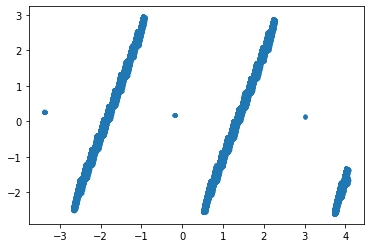

In [7]:
# TO REDUCE DIMENSIONALITY WE CAN USE PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(X_train)
x_test_reduced = pca.fit_transform(X_test)

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], marker='.')
plt.show()

In [8]:
# TESTING WITH MULTIPLE LINEAR REGRESSION MODEL 
linear_regression = LinearRegression()
linear_regression.fit(x_train_reduced, y_train)
y_pred = linear_regression.predict(x_test_reduced)
print(f"Model intercept : {linear_regression.intercept_}")
print(f"Model coefficients : {linear_regression.coef_}")

Model intercept : 8.525866983612175
Model coefficients : [-0.28479985 -0.02643982]


In [9]:
# MEASURING PERFORMANCE OF LINEAR REGRESSION MODEL
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 10.50387210597826
Mean Squared Error: 357.36859842404186
Root Mean Squared Error: 18.90419525988985
R2 Score: -0.05118380376217213
